In [1]:
from netCDF4 import Dataset

# Open the NetCDF file for reading
dataset = Dataset('jpld0010.14i.nc', 'r')

# Get the data variables
varepochs_data = dataset.variables['varepochs'][:]
time_data = dataset.variables['time'][:]
lat_data = dataset.variables['lat'][:]
lon_data = dataset.variables['lon'][:]
tecmap_data = dataset.variables['tecmap'][:]
tecflag_data = dataset.variables['tecflag'][:]

# Print the data
print("varepochs:", varepochs_data)
print("time:", time_data)
print("lat:", lat_data)
print("lon:", lon_data)
print("tecmap:", tecmap_data)
print("tecflag:", tecflag_data)

# Close the NetCDF file
dataset.close()

varepochs: ['2014/01/01_00:00:00' '2014/01/01_00:15:00' '2014/01/01_00:30:00'
 '2014/01/01_00:45:00' '2014/01/01_01:00:00' '2014/01/01_01:15:00'
 '2014/01/01_01:30:00' '2014/01/01_01:45:00' '2014/01/01_02:00:00'
 '2014/01/01_02:15:00' '2014/01/01_02:30:00' '2014/01/01_02:45:00'
 '2014/01/01_03:00:00' '2014/01/01_03:15:00' '2014/01/01_03:30:00'
 '2014/01/01_03:45:00' '2014/01/01_04:00:00' '2014/01/01_04:15:00'
 '2014/01/01_04:30:00' '2014/01/01_04:45:00' '2014/01/01_05:00:00'
 '2014/01/01_05:15:00' '2014/01/01_05:30:00' '2014/01/01_05:45:00'
 '2014/01/01_06:00:00' '2014/01/01_06:15:00' '2014/01/01_06:30:00'
 '2014/01/01_06:45:00' '2014/01/01_07:00:00' '2014/01/01_07:15:00'
 '2014/01/01_07:30:00' '2014/01/01_07:45:00' '2014/01/01_08:00:00'
 '2014/01/01_08:15:00' '2014/01/01_08:30:00' '2014/01/01_08:45:00'
 '2014/01/01_09:00:00' '2014/01/01_09:15:00' '2014/01/01_09:30:00'
 '2014/01/01_09:45:00' '2014/01/01_10:00:00' '2014/01/01_10:15:00'
 '2014/01/01_10:30:00' '2014/01/01_10:45:00' '2014/

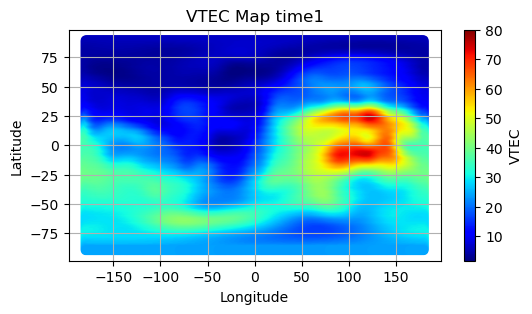

In [2]:
from matplotlib import pyplot as plt, colorbar, ticker, colors
import numpy as np
grid_lons, grid_lats = np.meshgrid(lon_data, lat_data)

# 绘制地图
plt.figure(figsize=(6, 3))
plt.scatter(grid_lons, grid_lats, c=tecmap_data[24,:,:], cmap='jet' , vmax = 80)
plt.colorbar(label='VTEC')  # 添加颜色条
plt.title('VTEC Map time1')  # 添加标题
plt.xlabel('Longitude')  # 添加横轴标签
plt.ylabel('Latitude')  # 添加纵轴标签
plt.grid(True)  # 添加网格线
plt.show()

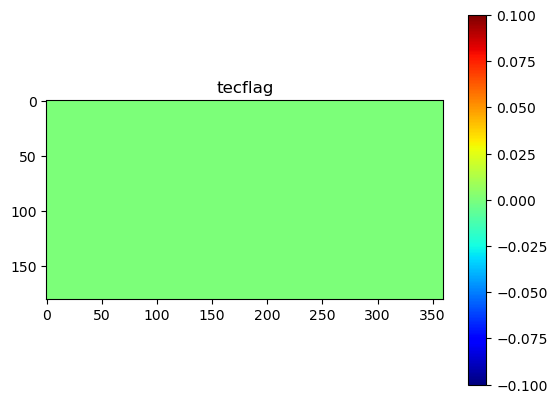

In [3]:
from matplotlib import pyplot as plt, colorbar, ticker, colors
plt.imshow(tecflag_data[24,:,:], cmap='jet')
plt.colorbar()
plt.title('tecflag')
plt.show()

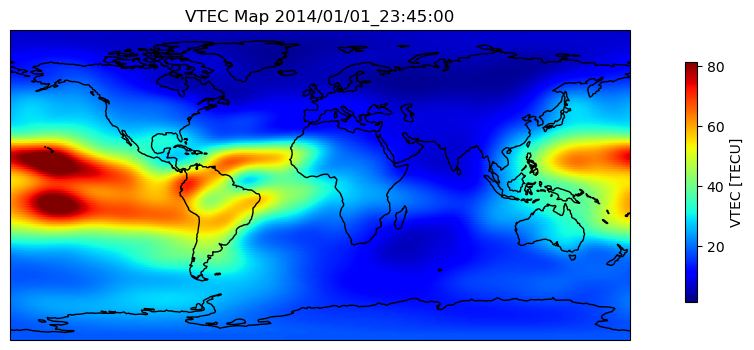

In [16]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open the NetCDF file for reading
dataset = Dataset('jpld0010.14i.nc', 'r')

# Get the data variables
varepochs_data = dataset.variables['varepochs'][:]
lat_data = dataset.variables['lat'][:]
lon_data = dataset.variables['lon'][:]
tecmap_data = dataset.variables['tecmap'][:]

# Close the NetCDF file
dataset.close()

grid_lons, grid_lats = np.meshgrid(lon_data, lat_data)

# Create the figure and axis with specified size
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(grid_lons, grid_lats, c=tecmap_data[0,:,:], cmap='jet', transform=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('VTEC [TECU]')
cbar.ax.set_position([0.8, 0.3, 0.03, 0.4])  # Adjust the position and size of the colorbar (left, bottom, width, height)

# Update function for animation
def update(frame, sc, tecmap_data):
    sc.set_offsets(np.column_stack((grid_lons.ravel(), grid_lats.ravel())))
    sc.set_array(tecmap_data[frame,:,:].ravel())
    ax.set_title(f'VTEC Map {varepochs_data[frame]}')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(varepochs_data), fargs=(sc, tecmap_data), interval=200)

# Save the animation as a video
ani.save('animation.mp4', writer='ffmpeg')

# Display the animation
plt.show()